# Exploratory Data Analysis on Balck Friday Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load train data

In [2]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.shape

(550068, 12)

Load test data

In [4]:
df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
df_test.shape

(233599, 11)

Here we have merged the train and test dataset with .append()

In [6]:
f_df = df.append(df_test)
f_df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
f_df.shape

(783667, 12)

In [8]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


Data Analysis - 

Dropping 'User_ID' column as it is general serial number column.
we do not required this for data analysis

In [10]:
f_df.drop(columns=['User_ID'],axis=1,inplace=True)
f_df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


Feature Engineering - 

Feature Enginnering on Gender column

In [12]:
f_df['Gender']= f_df['Gender'].map({'F':0,'M':1})
f_df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


Feature Engineering on Age column

In [13]:
f_df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
pd.get_dummies(f_df['Age'],drop_first=True)

,18-25,26-35,36-45,46-50,51-55,55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
233594,0,1,0,0,0,0
233595,0,1,0,0,0,0
233596,0,1,0,0,0,0
233597,0,0,0,1,0,0


In [15]:
f_df['Age']= f_df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'51-55':6,'55+':7})
f_df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1.0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1.0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1.0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1.0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7.0,16,C,4+,0,8,NaN,NaN,7969.0


Feature Engineering on City_Category column

In [18]:
df_city=pd.get_dummies(f_df['City_Category'],drop_first=True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [19]:
final_df= pd.concat([f_df,df_city],axis=1)
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1.0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1.0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7.0,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [21]:
final_df.drop('City_Category',axis=1,inplace=True)

In [22]:
final_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1.0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1.0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7.0,16,4+,0,8,NaN,NaN,7969.0,0,1


In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         718389 non-null  float64
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(4), int64(4), object(2), uint8(2)
memory usage: 67.3+ MB


Handling missing values 

In [24]:
final_df.isnull().sum()

Product_ID                         0
Gender                             0
Age                            65278
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [25]:
final_df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [28]:
final_df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [31]:
final_df['Product_Category_2']=final_df['Product_Category_2'].fillna(final_df['Product_Category_2'].mode()[0])

In [32]:
final_df['Product_Category_2'].isnull().sum()

0

In [33]:
final_df['Product_Category_3']=final_df['Product_Category_3'].fillna(final_df['Product_Category_3'].mode()[0])

In [34]:
final_df.isnull().sum()

Product_ID                         0
Gender                             0
Age                            65278
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [39]:
final_df.shape

(783667, 12)

In [40]:
final_df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [42]:
final_df['Stay_In_Current_City_Years']=final_df['Stay_In_Current_City_Years'].str.replace('+','')

In [43]:
final_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1.0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1.0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7.0,16,4,0,8,8.0,16.0,7969.0,0,1


Here we have done feature engineering on the columns which are needed to perform data analysis

In [46]:
final_df['Stay_In_Current_City_Years']=final_df['Stay_In_Current_City_Years'].astype(int)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         718389 non-null  float64
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(4), int32(1), int64(4), object(1), uint8(2)
memory usage: 64.

Converting UINT datatype into INT

In [47]:
final_df['B']=final_df['B'].astype(int)
final_df['C']=final_df['C'].astype(int)

In [49]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         718389 non-null  float64
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(4), int32(3), int64(4), object(1)
memory usage: 68.8+ MB


Till here we have handled all the missing values and converted all important categorical features into numeric features

below section is consist of data analysis part using diff-diff graphs from matplotlib.pyplot and seaborn lib.

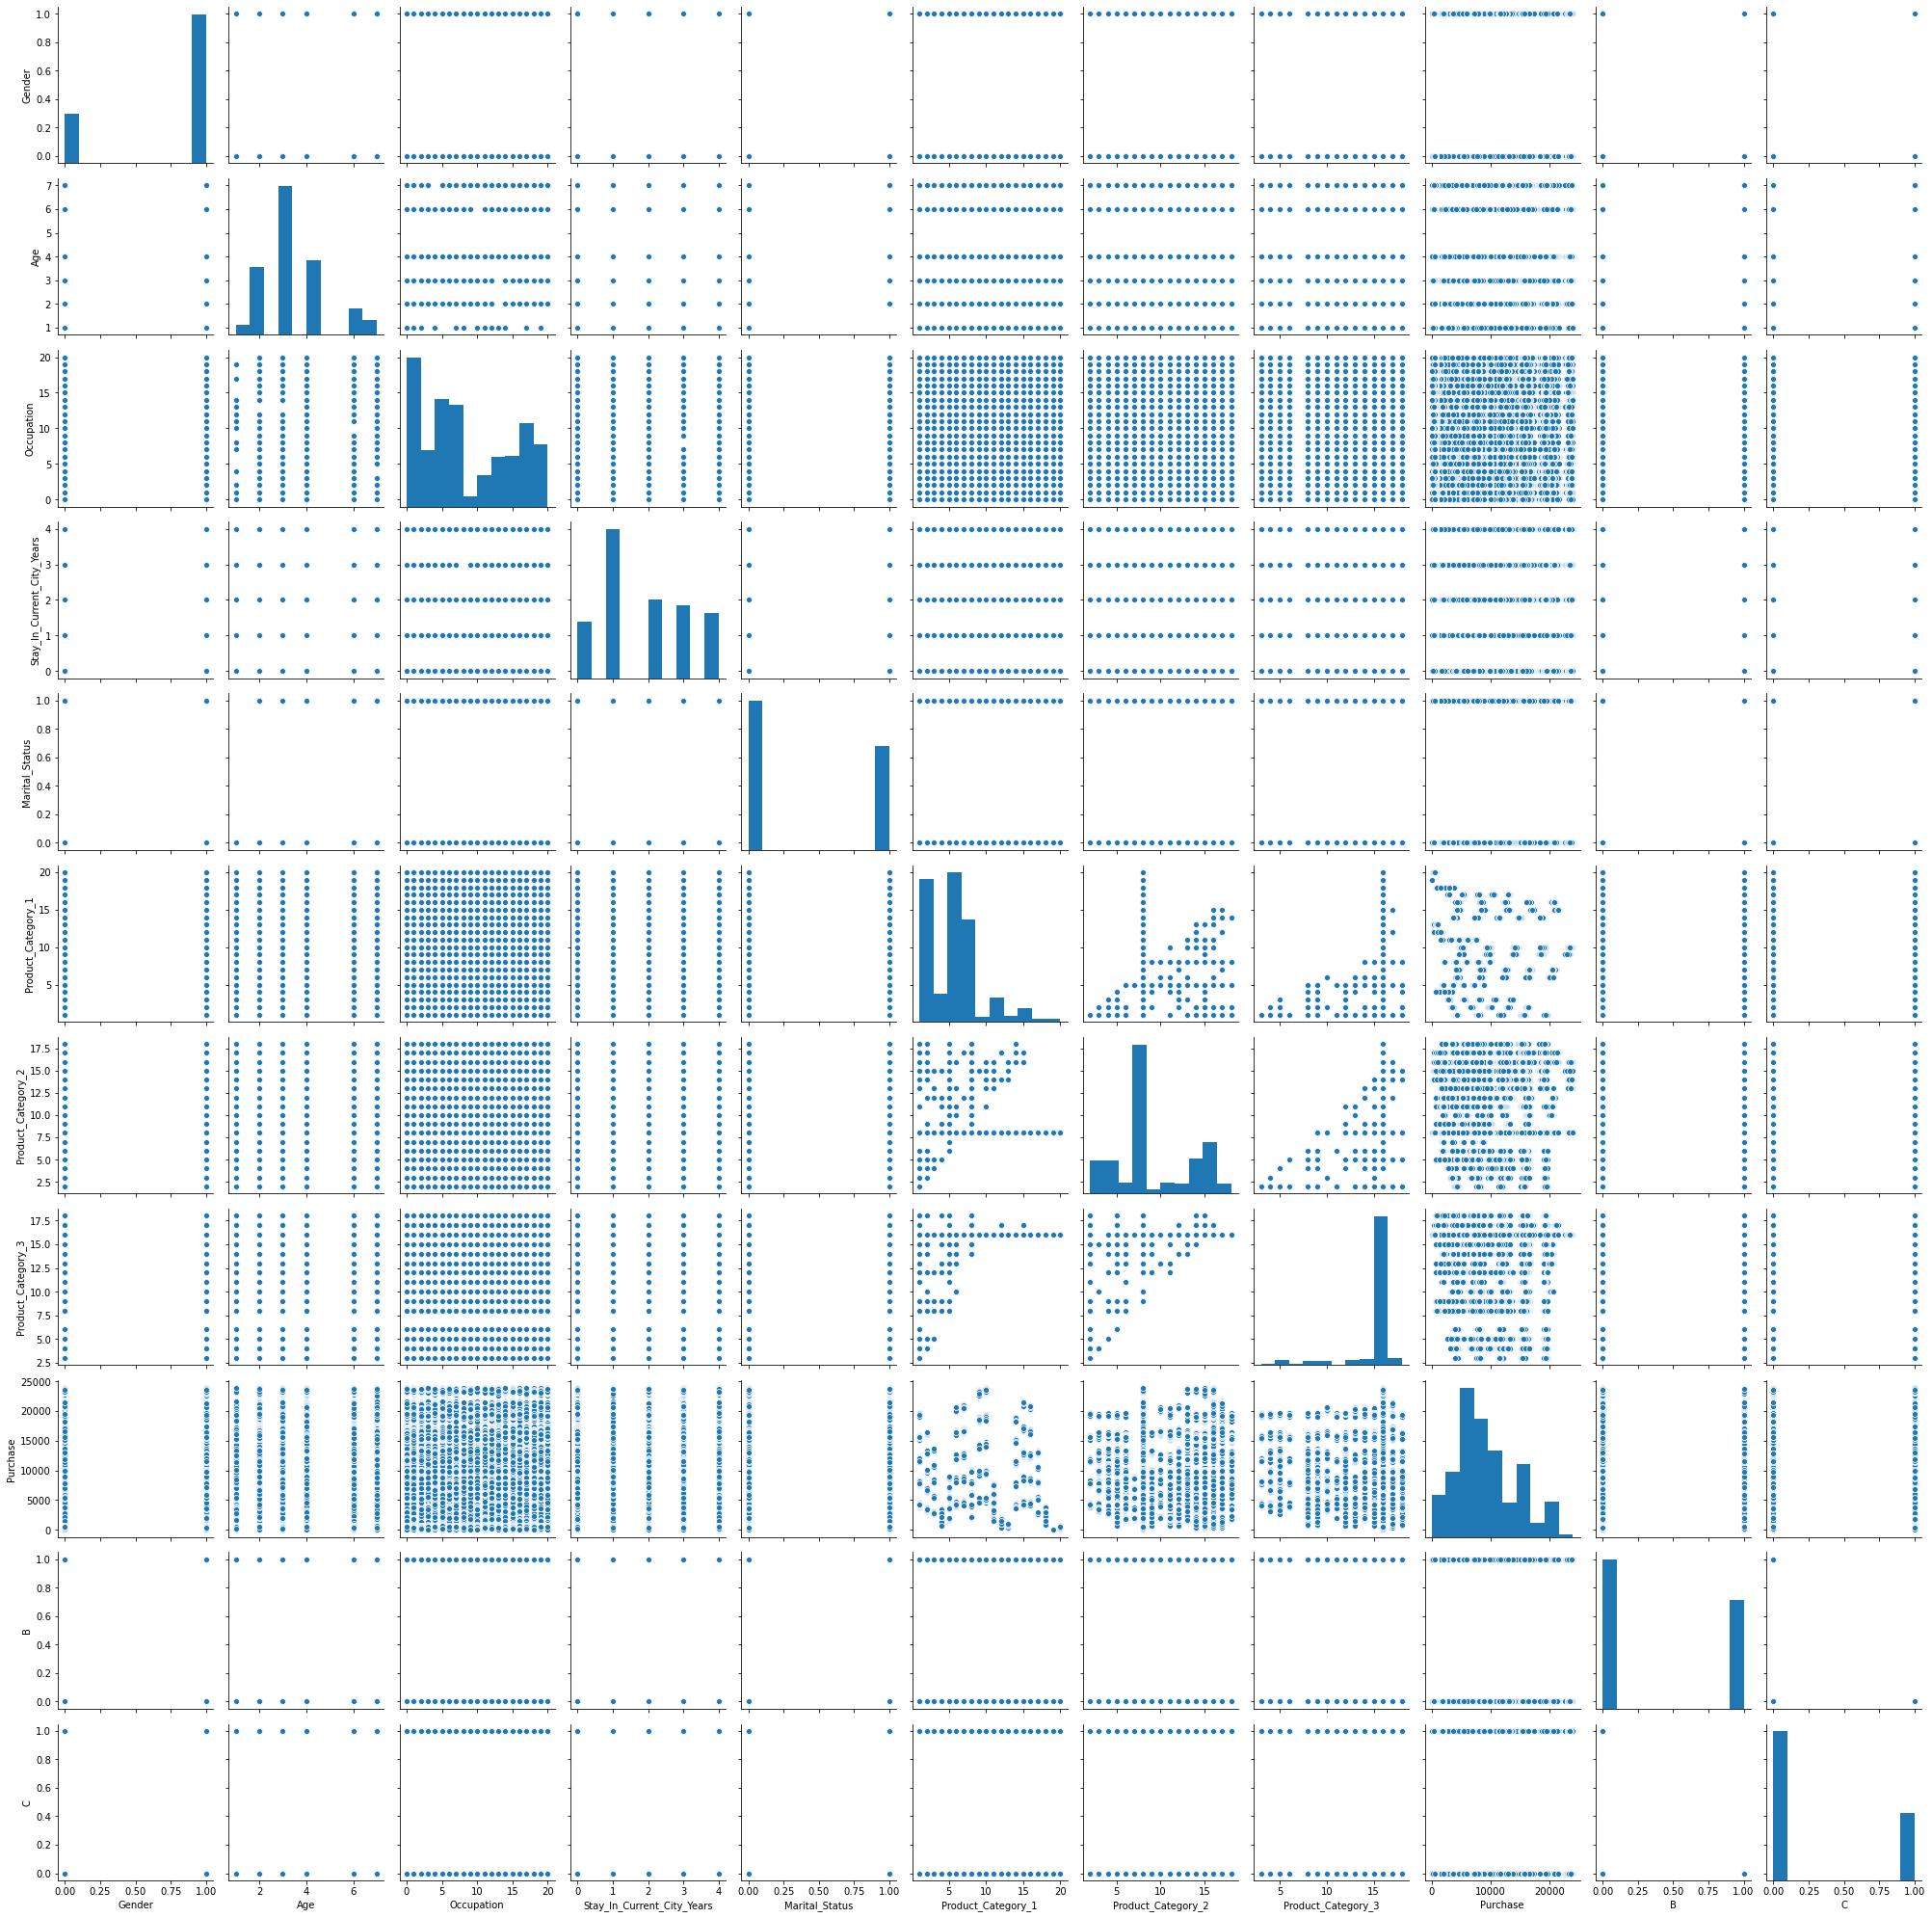

In [50]:
sns.pairplot(final_df)

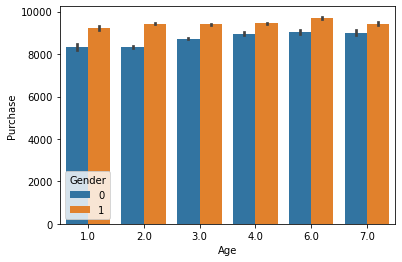

In [51]:
sns.barplot('Age','Purchase',hue='Gender',data=final_df)

Purchasing of men is high over women

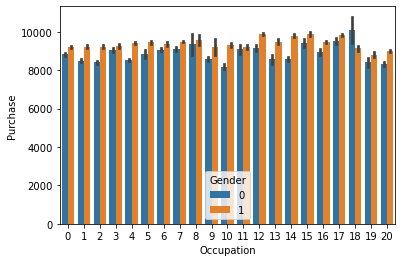

In [52]:
#  Visualization of purchase with occupation
sns.barplot('Occupation','Purchase',hue='Gender',data=final_df)

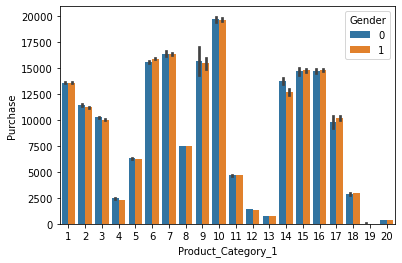

In [53]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=final_df)

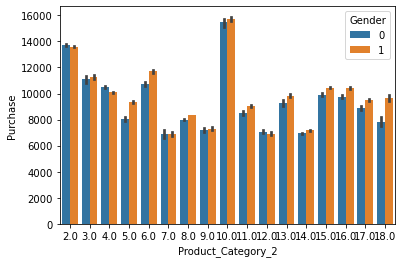

In [54]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=final_df)

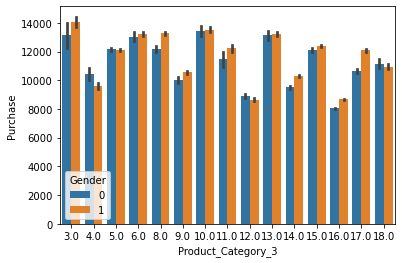

In [55]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=final_df)

by observing above barplot i can conclude that product 1 has bought more
as compare to product 2 and product 3

In [68]:
final_df.drop(columns=['Product_ID'],inplace=True)

Feature Sacling -



Here we have done seperation of test and train dataset

In [69]:
# Feature Scaling
df_test1=final_df[final_df['Purchase'].isnull()]
df_test1

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,NaN,7,2,1,1,11.0,16.0,NaN,1,0
1,1,3.0,17,0,0,3,5.0,16.0,NaN,0,1
2,0,4.0,1,4,1,5,14.0,16.0,NaN,1,0
3,0,4.0,1,4,1,4,9.0,16.0,NaN,1,0
4,0,3.0,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,0,3.0,15,4,1,8,8.0,16.0,NaN,1,0
233595,0,3.0,15,4,1,5,8.0,16.0,NaN,1,0
233596,0,3.0,15,4,1,1,5.0,12.0,NaN,1,0
233597,0,NaN,1,4,0,10,16.0,16.0,NaN,0,1


In [70]:
df_train1=final_df[~final_df['Purchase'].isnull()]
df_train1

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1.0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1.0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1.0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1.0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7.0,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,1,6.0,13,1,1,20,8.0,16.0,368.0,1,0
550064,0,3.0,1,3,0,20,8.0,16.0,371.0,0,1
550065,0,3.0,15,4,1,20,8.0,16.0,137.0,1,0
550066,0,7.0,1,2,0,20,8.0,16.0,365.0,0,1


from training dataset we have created x (independent features) and y (dependent feature)

In [78]:
x_scalar= df_train1.drop(columns=['Purchase'])
y_scalar=df_train1['Purchase']
y_scalar.shape, x_scalar.shape

((550068,), (550068, 10))

data has splitted in x_train,x_test,y_train,y_test with train_test_split

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scalar,y_scalar,test_size=.30,random_state=142)

StandardScaler performed on the x_train and x_test to scale out data, now data has distributed standard noramally

In [80]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test =scalar.transform(x_test)

As you can clearly see SD = 1 and mean is around 0 hence we can conclude that x test and x_train data has 
follows standard noramal pattern

In [84]:
pd.DataFrame(x_test).describe()

,0,1,2,3,4,5,6,7,8,9
count,165021.000000,151121.000000,165021.000000,165021.000000,165021.000000,165021.000000,165021.000000,165021.000000,165021.000000,165021.000000
mean,-0.003438,-0.001604,0.004967,-0.000422,-0.000446,-0.000051,-0.002738,-0.000244,0.000752,0.000548
std,1.002018,0.998983,1.003606,0.999476,0.999921,0.999218,0.999407,1.002153,1.000124,1.000227
min,-1.748603,-1.771499,-1.238108,-1.441157,-0.833131,-1.118664,-1.691395,-4.378901,-0.851227,-0.672024
25%,0.571885,-0.270757,-0.931151,-0.665750,-0.833131,-1.118664,-0.294374,0.368957,-0.851227,-0.672024
50%,0.571885,-0.270757,-0.163761,0.109657,-0.833131,-0.102696,-0.294374,0.368957,-0.851227,-0.672024
75%,0.571885,0.479614,0.910586,0.885064,1.200291,0.659279,1.102647,0.368957,1.174774,1.488042
max,0.571885,2.730728,1.831455,1.660471,1.200291,3.707181,2.033994,1.099397,1.174774,1.488042


In [85]:
pd.DataFrame(x_train).describe()

,0,1,2,3,4,5,6,7,8,9
count,3.850470e+05,3.532460e+05,3.850470e+05,3.850470e+05,3.850470e+05,3.850470e+05,3.850470e+05,3.850470e+05,3.850470e+05,3.850470e+05
mean,-8.409152e-16,-3.472974e-16,-1.756689e-16,1.996183e-15,-1.737659e-15,9.217192e-16,-1.271378e-15,2.306682e-15,-5.557194e-15,1.614327e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.748603e+00,-1.771499e+00,-1.238108e+00,-1.441157e+00,-8.331314e-01,-1.118664e+00,-1.691395e+00,-4.378901e+00,-8.512272e-01,-6.720239e-01
25%,5.718852e-01,-2.707569e-01,-9.311513e-01,-6.657497e-01,-8.331314e-01,-1.118664e+00,-2.943744e-01,3.689570e-01,-8.512272e-01,-6.720239e-01
50%,5.718852e-01,-2.707569e-01,-1.637607e-01,1.096574e-01,-8.331314e-01,-1.026965e-01,-2.943744e-01,3.689570e-01,-8.512272e-01,-6.720239e-01
75%,5.718852e-01,4.796142e-01,9.105861e-01,8.850644e-01,1.200291e+00,6.592789e-01,1.102647e+00,3.689570e-01,1.174774e+00,1.488042e+00
max,5.718852e-01,2.730728e+00,1.831455e+00,1.660471e+00,1.200291e+00,3.707181e+00,2.033994e+00,1.099397e+00,1.174774e+00,1.488042e+00


On the black Friday dataset we have performed data analysis successfully. now this dataset is ready to train the Model